In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#import of inital info
raw_df = pd.read_csv("/Users/eamonnmccallum/Monash-DS/gwil_wrk1/data/gwil_datv2.csv")

In [3]:
#review of raw data layout
raw_df.sample(20)

,ID,UNI_ID,UNI_TITLE,GROUP,MED,JOB CAT,JOB ID,JOB_TITLE,YEAR,VALUE
6883,13714,33,University of Southern Queensland,3,0,2,13,Academic level C,2014,111.00
9258,10432,24,The University of New England,2,0,2,12,Academic level B,2010,189.00
3545,6095,12,James Cook University,2,1,1,10,HEW Level 10,2007,42.56
2058,4855,9,Federation University Australia,3,0,2,11,Academic level A or below,1997,21.00
11957,9424,21,The Australian National University,1,1,1,7,HEW Level 7,2014,364.02
7918,15313,38,Victoria University,3,0,2,14,Academic level D and E,2003,141.00
5465,6214,12,James Cook University,2,1,1,10,HEW Level 10,2014,77.17
1001,10977,26,The University of Notre Dame Australia,3,0,2,13,Academic level C,2000,8.00
5547,1994,1,Australian Catholic University,3,0,1,6,HEW Level 6,1997,79.41
3527,12381,30,University of Canberra,3,0,1,6,HEW Level 6,1999,42.25


In [4]:
raw_df["JOB_TITLE"].unique()

array(['HEW Level 1', 'Casuals academic', 'SE ',
       'Academic level A or below', 'Academic level B ',
       'Academic level C ', 'Academic level D and E',
       'Casuals non-academic', 'HEW Level 2', 'HEW Level 10',
       'HEW Level 9', 'HEW Level 8', 'HEW Level 7', 'HEW Level 3',
       'HEW Level 6', 'HEW Level 5', 'HEW Level 4'], dtype=object)

In [5]:
#generate new data frame by job title
raw_df.sort_values(by='JOB_TITLE', inplace=True)
raw_df.set_index(keys=['JOB_TITLE'], drop=False,inplace=True)
jobid =raw_df['JOB_TITLE'].unique().tolist()



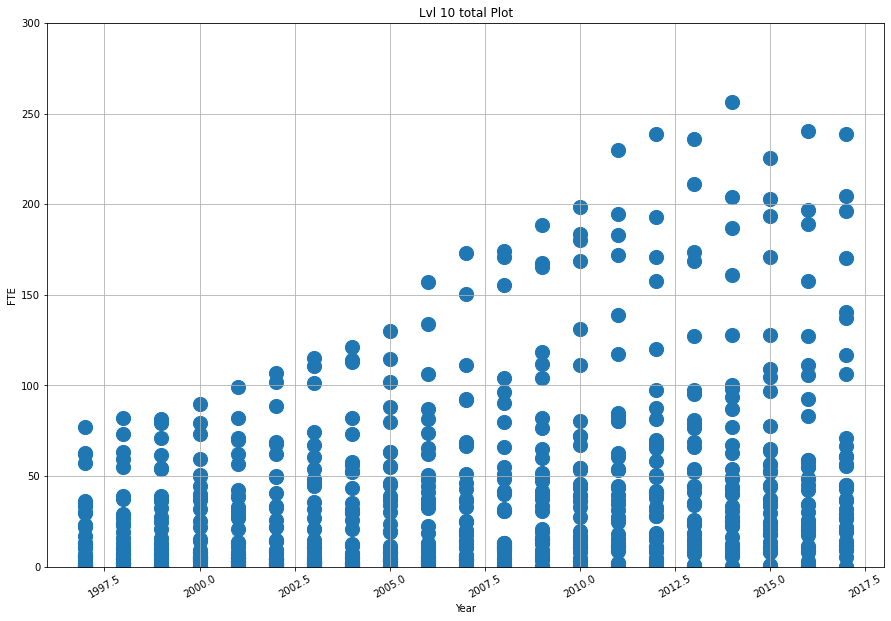

In [94]:
# Reivew of spread of a few job types over time
job10 = raw_df.loc[(raw_df["JOB_TITLE"]=='HEW Level 10')]
plt.figure(figsize=(15,10))
plt.scatter(job10["YEAR"],job10["VALUE"], 200)
plt.title("Lvl 10 total Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
plt.ylim(0, 300)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/lvl10_all.png")

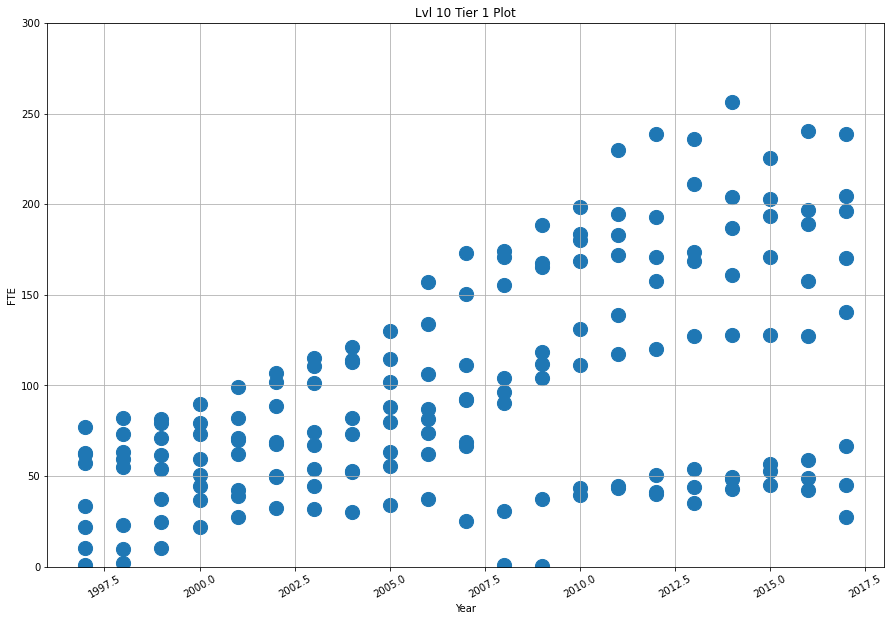

In [95]:
job10_1 = raw_df.loc[(raw_df["JOB_TITLE"]=='HEW Level 10')&(raw_df["GROUP"]==1)]
plt.figure(figsize=(15,10))
plt.scatter(job10_1["YEAR"],job10_1["VALUE"], 200)
plt.title("Lvl 10 Tier 1 Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 300)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/lvl10_gp1.png")

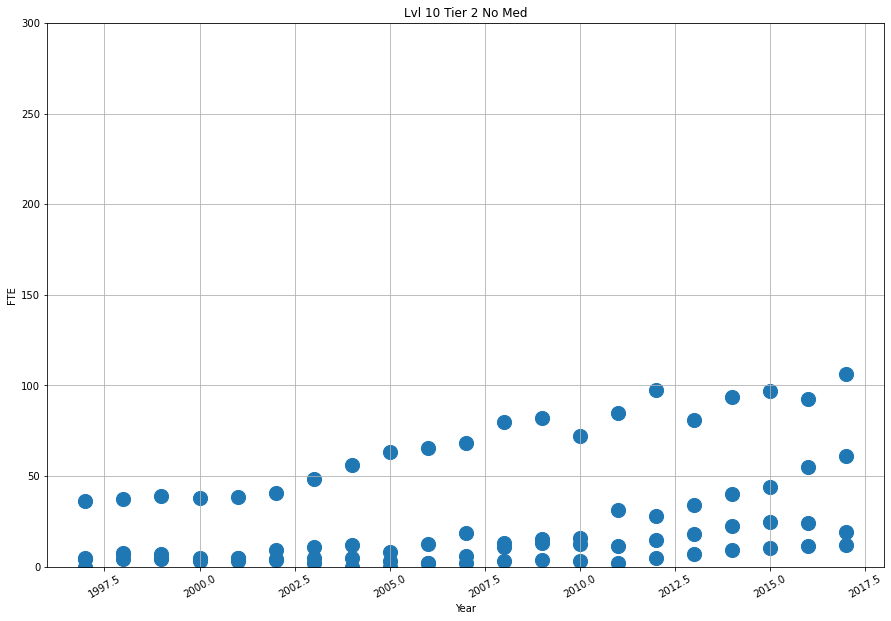

In [96]:
job10_2 = raw_df.loc[(raw_df["JOB_TITLE"]=='HEW Level 10')&(raw_df["GROUP"]==2)&(raw_df["MED"]==0)]
plt.figure(figsize=(15,10))
plt.scatter(job10_2["YEAR"],job10_2["VALUE"], 200)
plt.title("Lvl 10 Tier 2 No Med")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
plt.ylim(0, 300)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/lvl10_gp2N.png")

In [12]:
#New Dataframe to review pay different  groups in HEW levels of Jobs
job_df = raw_df[["JOB_TITLE", "JOB ID","YEAR", "VALUE","GROUP" ,"MED"]]

In [13]:
job1 = job_df.loc[(job_df["JOB_TITLE"]=='HEW Level 1')]
job2 = job_df.loc[(job_df["JOB_TITLE"]=='HEW Level 2')]
job3 = job_df.loc[(job_df["JOB_TITLE"]=='HEW Level 3')]
job4 = job_df.loc[(job_df["JOB_TITLE"]=='HEW Level 4')]


In [14]:
pd_list = [ job1, job2, job3, job4]

In [15]:
hew1_4 = pd.concat(pd_list)

In [16]:
hew1_4.sort_values(by='YEAR', inplace=True)

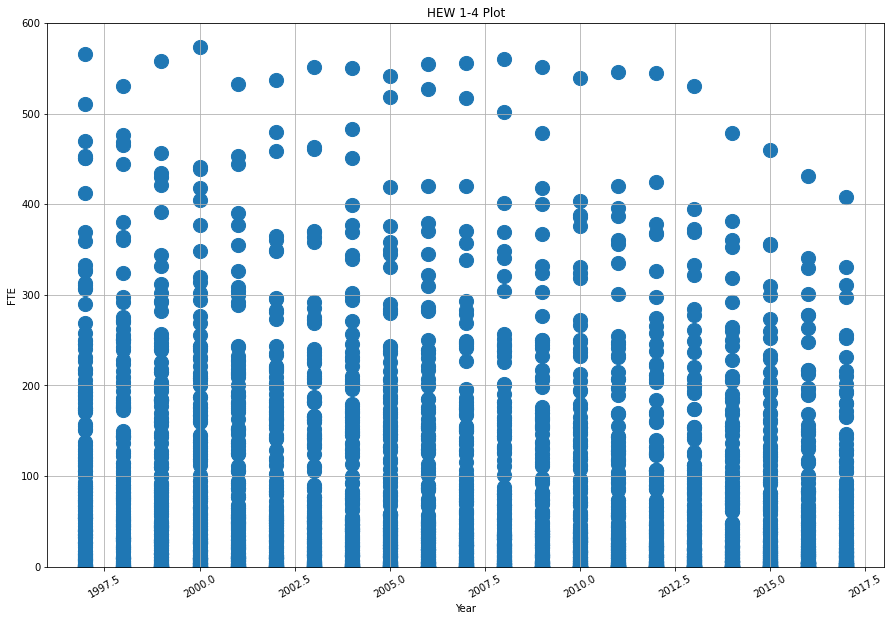

In [98]:
plt.figure(figsize=(15,10))
plt.scatter(hew1_4["YEAR"],hew1_4["VALUE"], 200)
plt.title("HEW 1-4 Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 600)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/hew1_4_all.png")

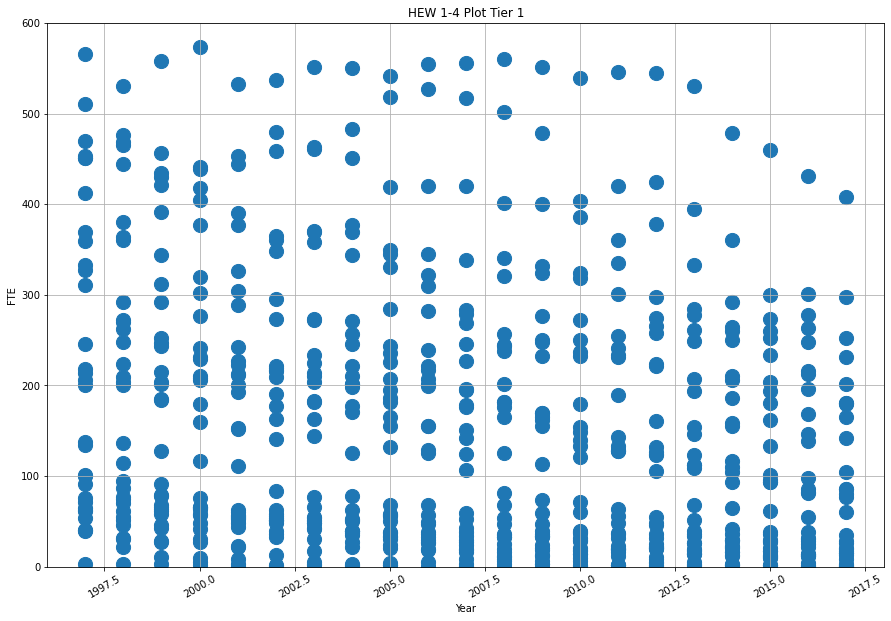

In [99]:
hew1_4_g1 = hew1_4.loc[(hew1_4["GROUP"]== 1)]
plt.figure(figsize=(15,10))
plt.scatter(hew1_4_g1["YEAR"],hew1_4_g1["VALUE"], 200)
plt.title("HEW 1-4 Plot Tier 1")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 600)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/hew1_4_gp1.png")

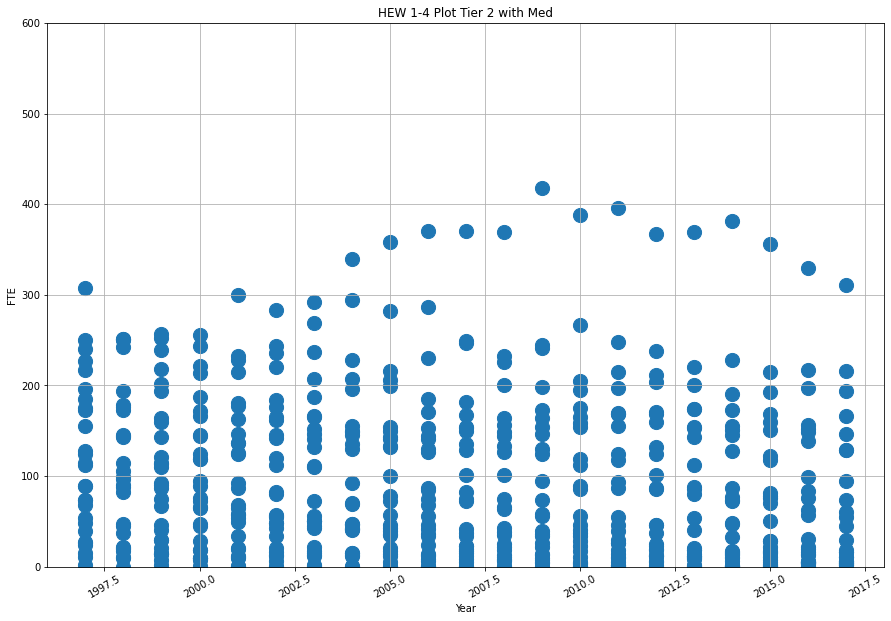

In [100]:
hew1_4_g2m = hew1_4.loc[(hew1_4["GROUP"]== 2)&(hew1_4["MED"]==1)]
plt.figure(figsize=(15,10))
plt.scatter(hew1_4_g2m["YEAR"],hew1_4_g2m["VALUE"], 200)
plt.title("HEW 1-4 Plot Tier 2 with Med")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 600)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/hew1_4_gp2m.png")

In [23]:
#Split Original DF Job Classifion or Job ID
bins = [0,4,7,9,10,11,12,13,14,15,16,17]

In [24]:
job_bins = job_df
labels = [1,2,3,4,5,6,7,8,9,10,11]
job_bins["BINS"] = pd.cut(job_bins["JOB ID"], bins, labels=labels, include_lowest=True)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
job_bins["BINS"] = pd.to_numeric(job_bins["BINS"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
# Plotting Salary changes by new Job ID groups
hew5_7 = job_bins.loc[(job_bins["BINS"]== 2)]

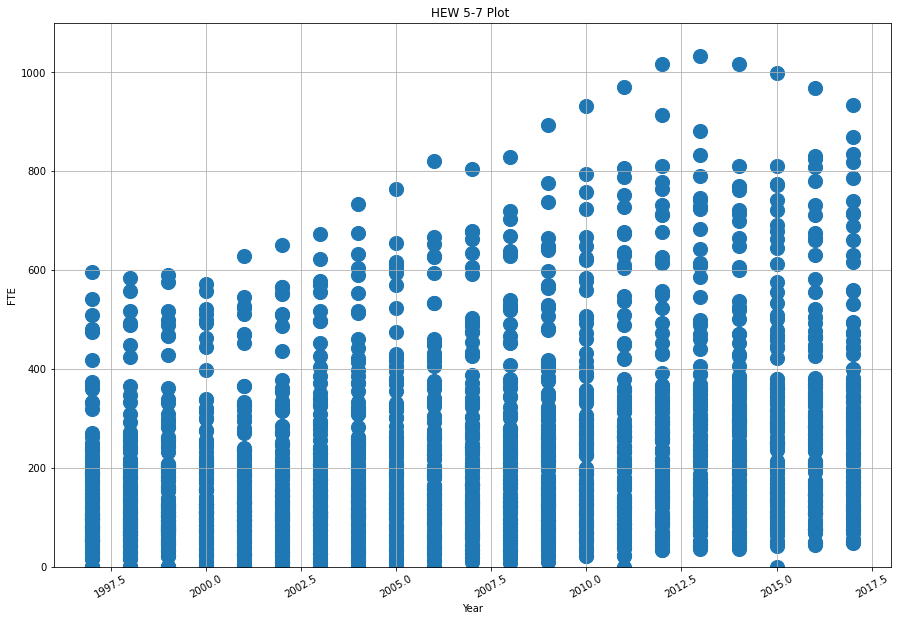

In [105]:
plt.figure(figsize=(15,10))
plt.scatter(hew5_7["YEAR"],hew5_7["VALUE"], 200)
plt.title("HEW 5-7 Plot ")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1100)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/hew5_7_all.png")

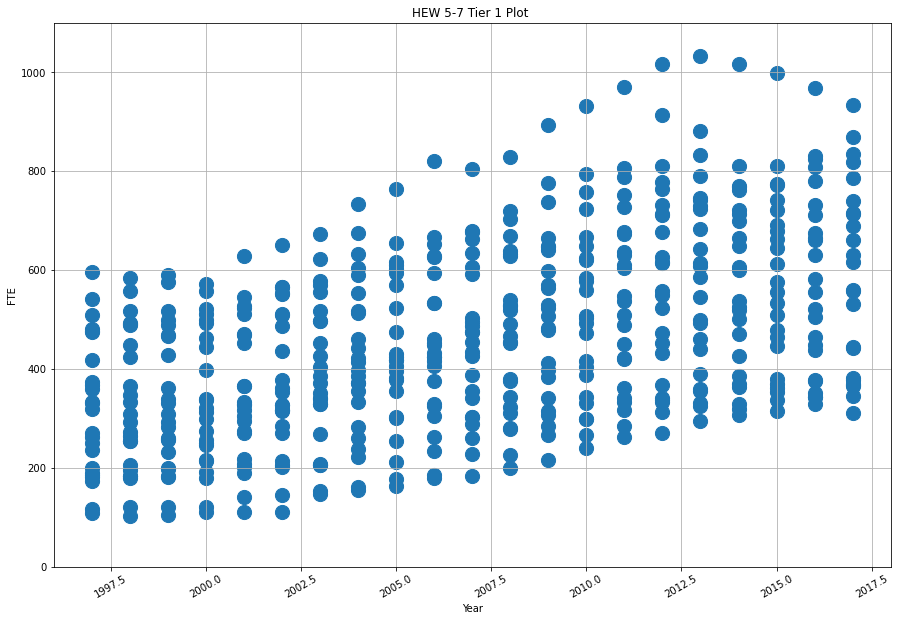

In [106]:
hew5_7_gp1 = hew5_7.loc[(hew5_7["GROUP"]== 1 )]
plt.figure(figsize=(15,10))
plt.scatter(hew5_7_gp1["YEAR"],hew5_7_gp1["VALUE"], 200)
plt.title("HEW 5-7 Tier 1 Plot ")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1100)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/hew5_7_gp1.png")

In [41]:
# New Group for Academic roles

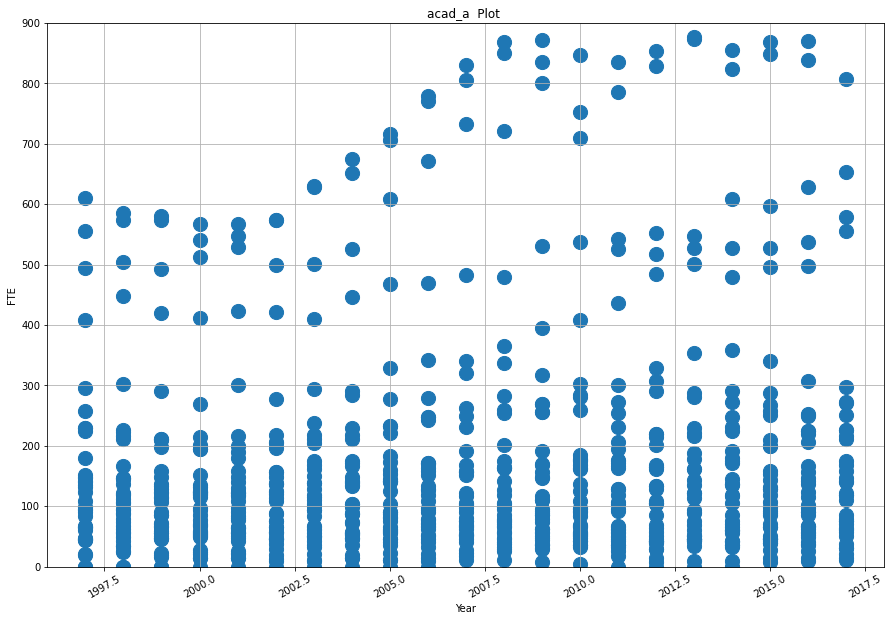

In [117]:
acad_a = job_bins.loc[(job_bins["BINS"]== 5)]
plt.figure(figsize=(15,10))
plt.scatter(acad_a["YEAR"],acad_a["VALUE"], 200)
plt.title("acad_a  Plot ")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 900)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_a_all.png")

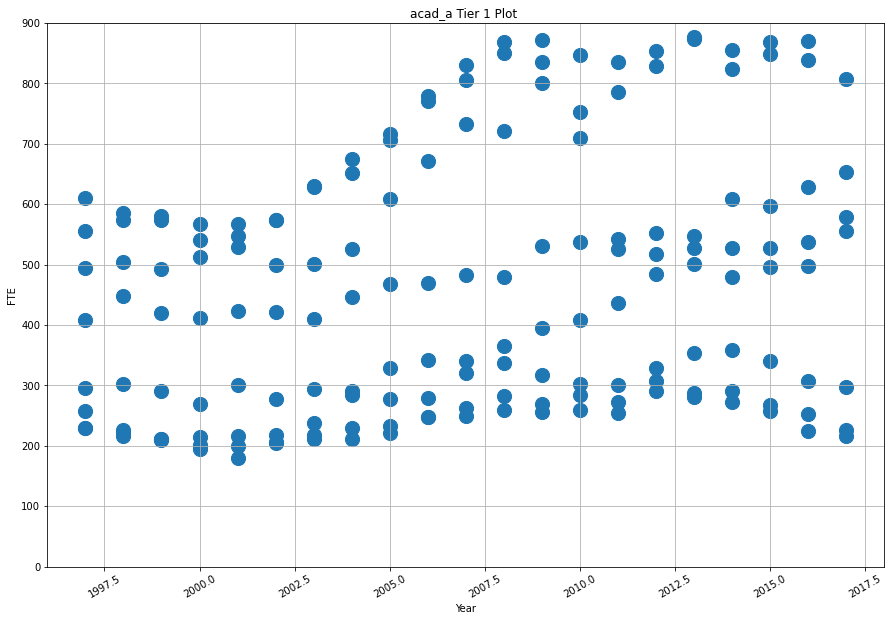

In [118]:
acad_a_gp1 = acad_a.loc[(acad_a["GROUP"]== 1 )]
plt.figure(figsize=(15,10))
plt.scatter(acad_a_gp1["YEAR"],acad_a_gp1["VALUE"], 200)
plt.title("acad_a Tier 1 Plot ")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 900)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_a_gp1.png")

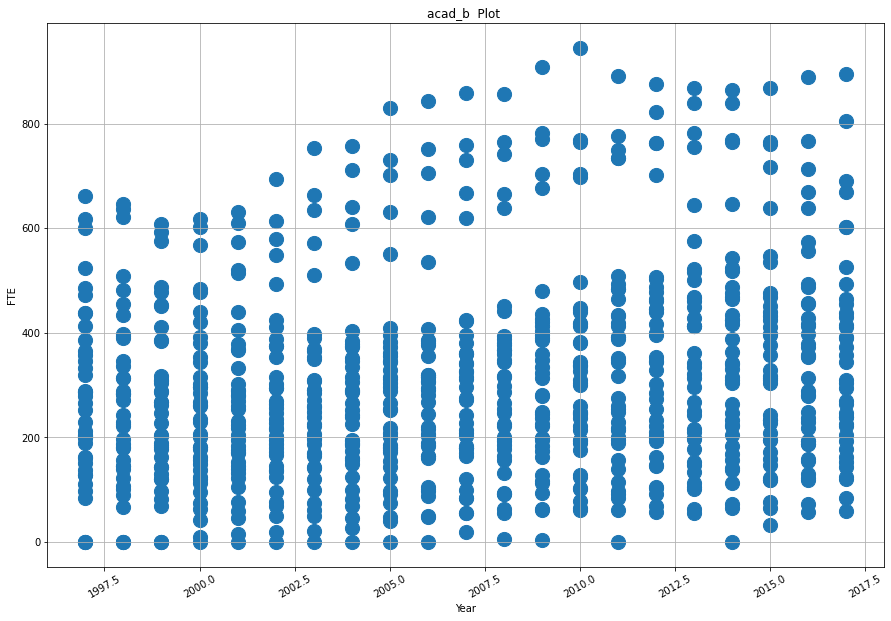

In [49]:
#1 All 
acad_b = job_bins.loc[(job_bins["BINS"]== 6)]
plt.figure(figsize=(15,10))
plt.scatter(acad_b["YEAR"],acad_b["VALUE"], 200)
plt.title("acad_b  Plot ")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 900)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_b_all.png")

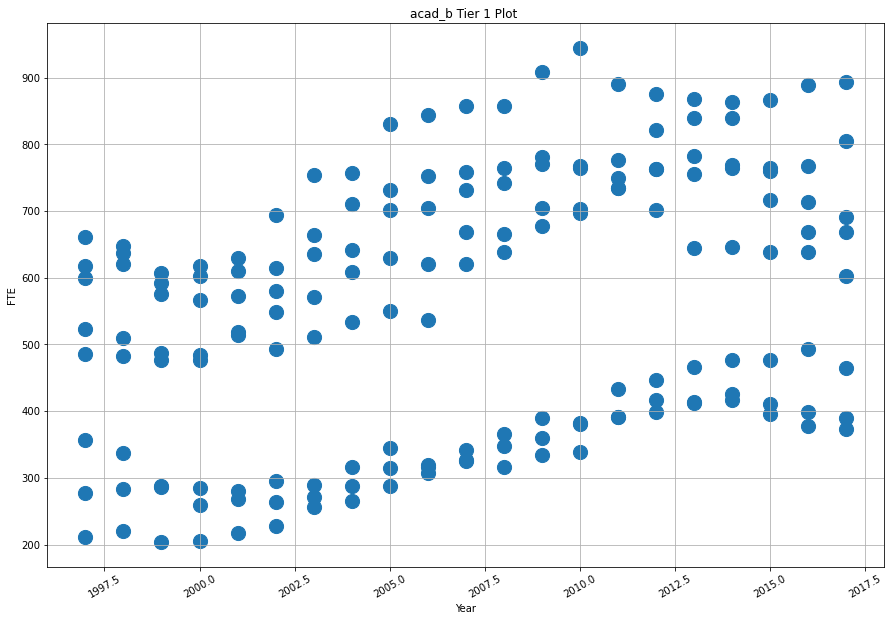

In [123]:
#2 - group 1
acad_b_gp1 = acad_b.loc[(acad_b["GROUP"]== 1 )]
plt.figure(figsize=(15,10))
plt.scatter(acad_b_gp1["YEAR"],acad_b_gp1["VALUE"], 200)
plt.title("acad_b Tier 1 Plot ")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_b_gp1.png")

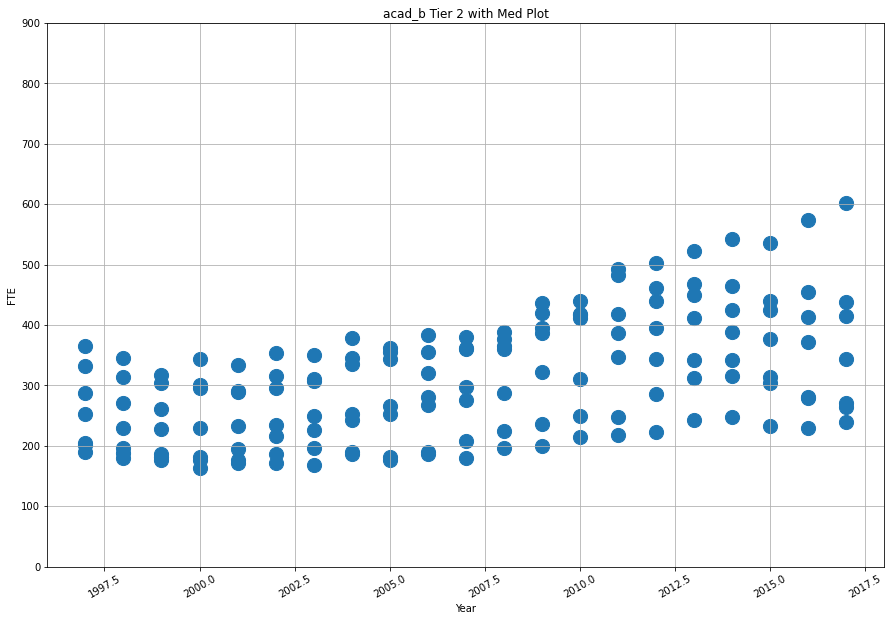

In [124]:
#3 gp2 with med
acad_b_gp2m = acad_b.loc[(acad_b["GROUP"]== 2 )&(acad_b["MED"]==1)]
plt.figure(figsize=(15,10))
plt.scatter(acad_b_gp2m["YEAR"],acad_b_gp2m["VALUE"], 200)
plt.title("acad_b Tier 2 with Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 900)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_b_gp2m.png")

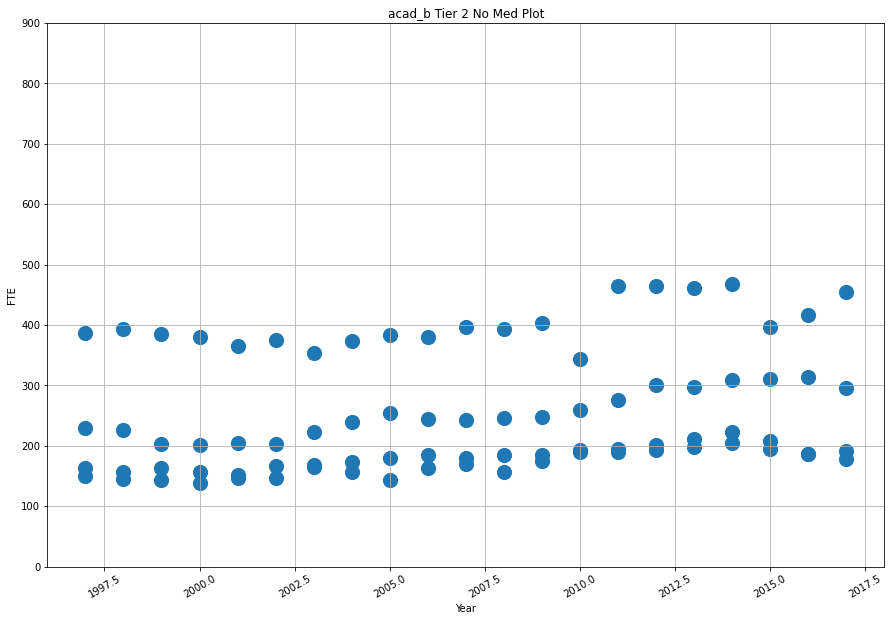

In [125]:
#4 gp2 no med
acad_b_gp2N = acad_b.loc[(acad_b["GROUP"]== 2 )&(acad_b["MED"]==0)]
plt.figure(figsize=(15,10))
plt.scatter(acad_b_gp2N["YEAR"],acad_b_gp2N["VALUE"], 200)
plt.title("acad_b Tier 2 No Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 900)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_b_gp2N.png")

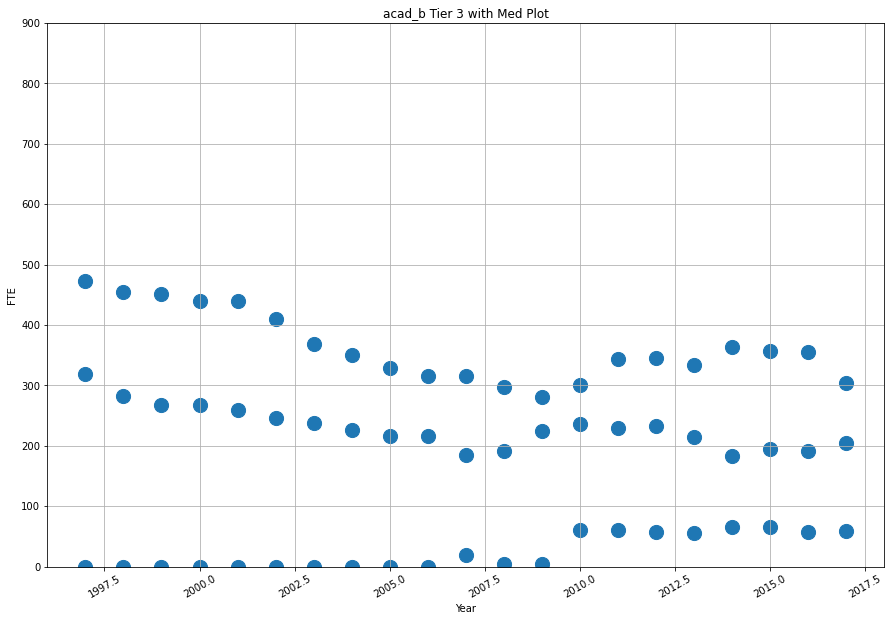

In [126]:
#5 gp3 with med
acad_b_gp3m = acad_b.loc[(acad_b["GROUP"]== 3 )&(acad_b["MED"]==1)]
plt.figure(figsize=(15,10))
plt.scatter(acad_b_gp3m["YEAR"],acad_b_gp3m["VALUE"], 200)
plt.title("acad_b Tier 3 with Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 900)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_b_gp3m.png")

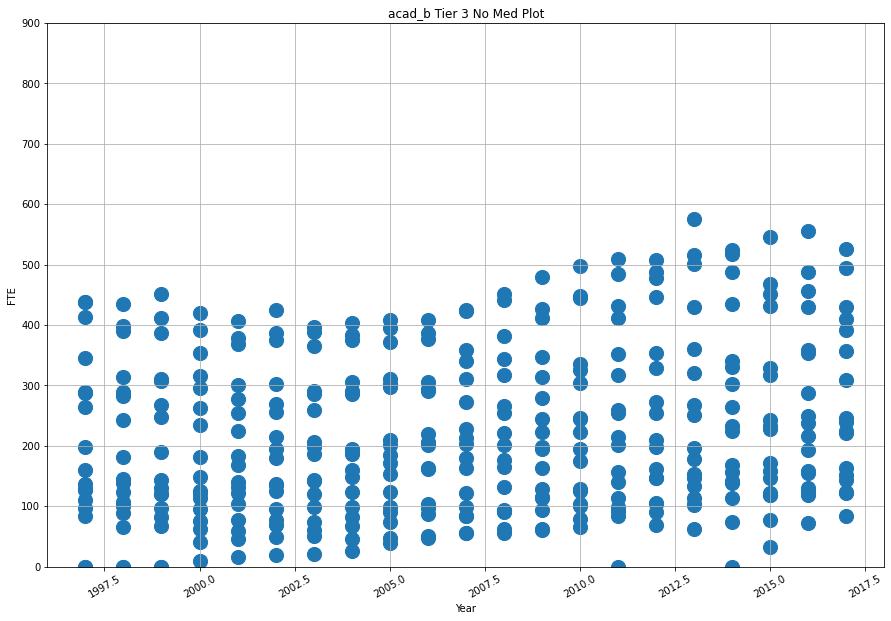

In [127]:
#6 gp3 no med
acad_b_gp3N = acad_b.loc[(acad_b["GROUP"]== 3 )&(acad_b["MED"]==0)]
plt.figure(figsize=(15,10))
plt.scatter(acad_b_gp3N["YEAR"],acad_b_gp3N["VALUE"], 200)
plt.title("acad_b Tier 3 No Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 900)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_b_gp3N.png")

In [55]:
### Academic c 

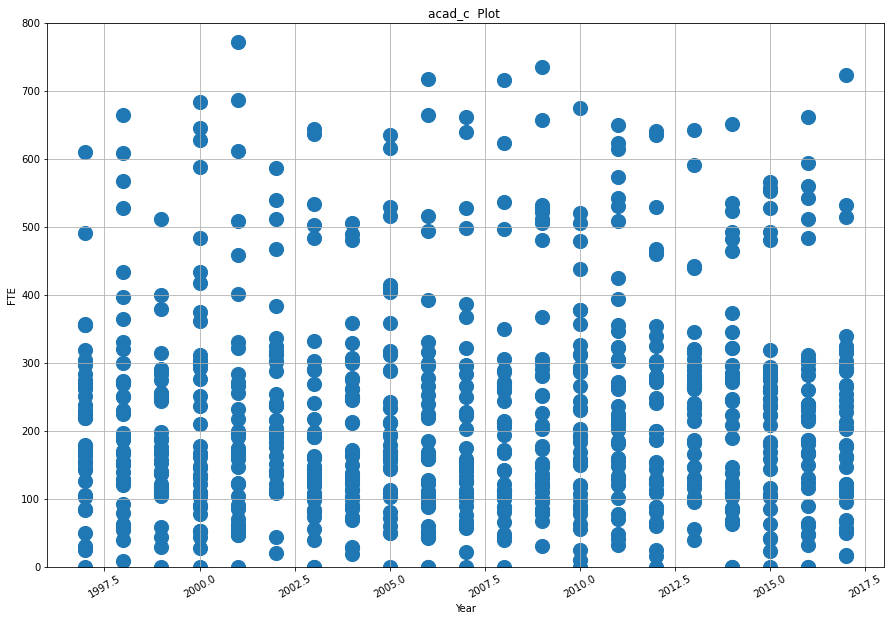

In [128]:
acad_c = job_bins.loc[(job_bins["BINS"]== 7)]
plt.figure(figsize=(15,10))
plt.scatter(acad_b["YEAR"],acad_c["VALUE"], 200)
plt.title("acad_c  Plot ")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 800)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_c_all.png")

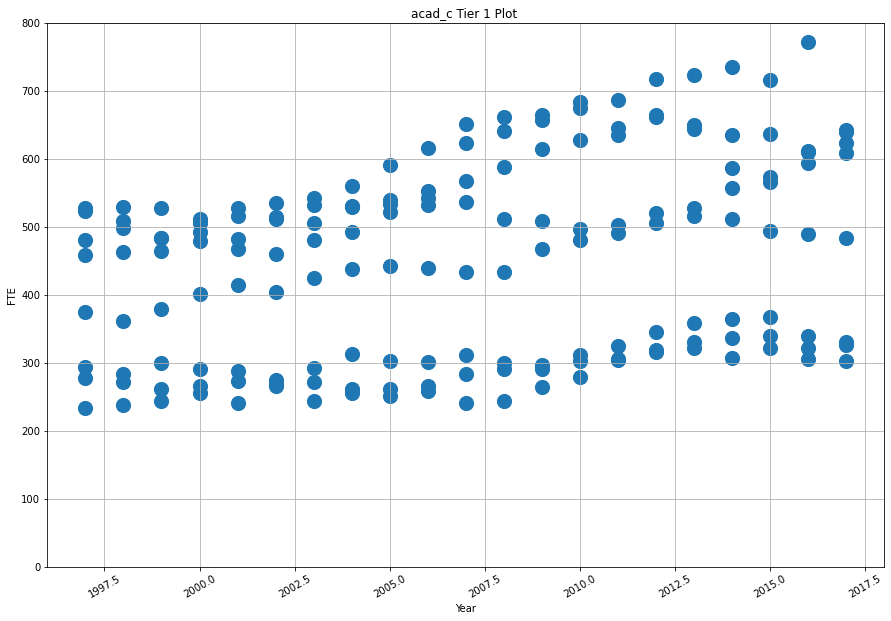

In [129]:
acad_c_gp1 = acad_c.loc[(acad_c["GROUP"]== 1 )]
plt.figure(figsize=(15,10))
plt.scatter(acad_c_gp1["YEAR"],acad_c_gp1["VALUE"], 200)
plt.title("acad_c Tier 1 Plot ")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 800)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_c_gp1.png")

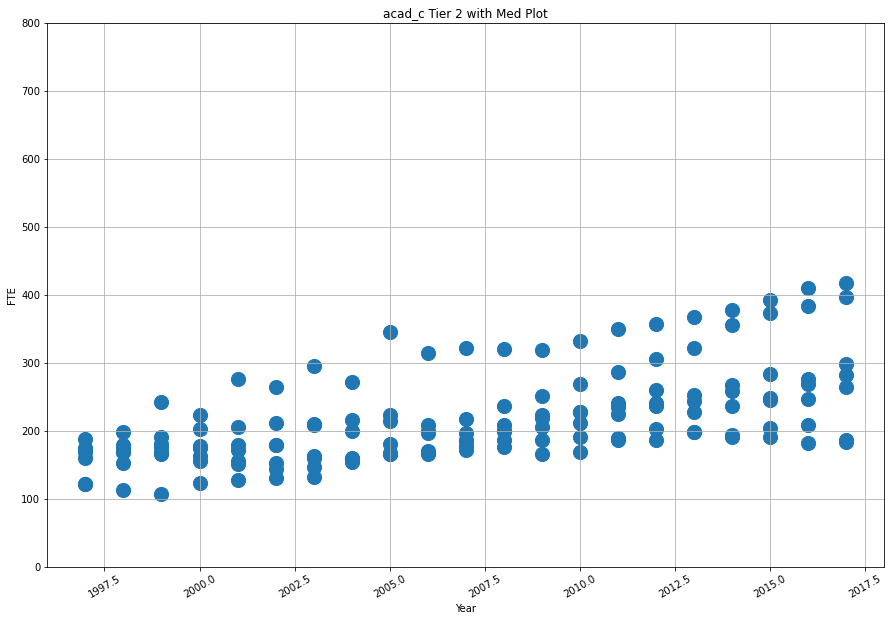

In [130]:
#3 gp2 with med
acad_c_gp2m = acad_c.loc[(acad_c["GROUP"]== 2 )&(acad_c["MED"]==1)]
plt.figure(figsize=(15,10))
plt.scatter(acad_c_gp2m["YEAR"],acad_c_gp2m["VALUE"], 200)
plt.title("acad_c Tier 2 with Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 800)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_c_gp2m.png")

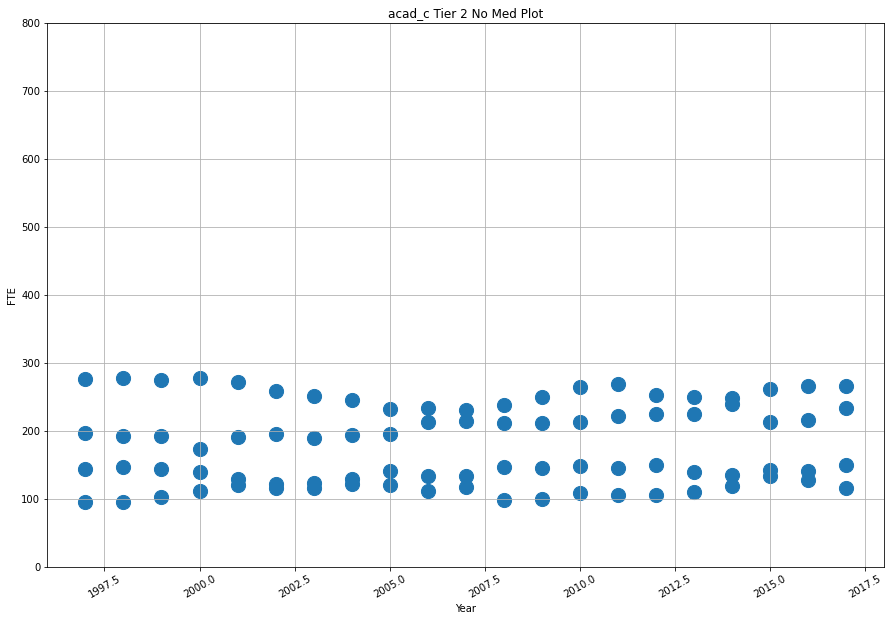

In [131]:
#4 gp2 no med
acad_c_gp2N = acad_c.loc[(acad_c["GROUP"]== 2 )&(acad_c["MED"]==0)]
plt.figure(figsize=(15,10))
plt.scatter(acad_c_gp2N["YEAR"],acad_c_gp2N["VALUE"], 200)
plt.title("acad_c Tier 2 No Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 800)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_c_gp2N.png")

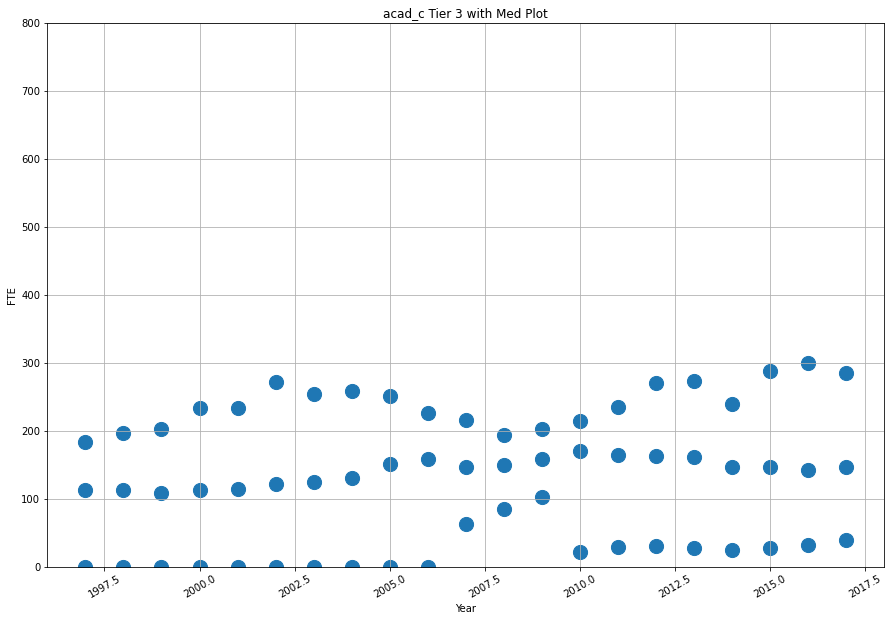

In [132]:
#5 gp3 with med
acad_c_gp3m = acad_c.loc[(acad_c["GROUP"]== 3 )&(acad_c["MED"]==1)]
plt.figure(figsize=(15,10))
plt.scatter(acad_c_gp3m["YEAR"],acad_c_gp3m["VALUE"], 200)
plt.title("acad_c Tier 3 with Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 800)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_c_gp3m.png")

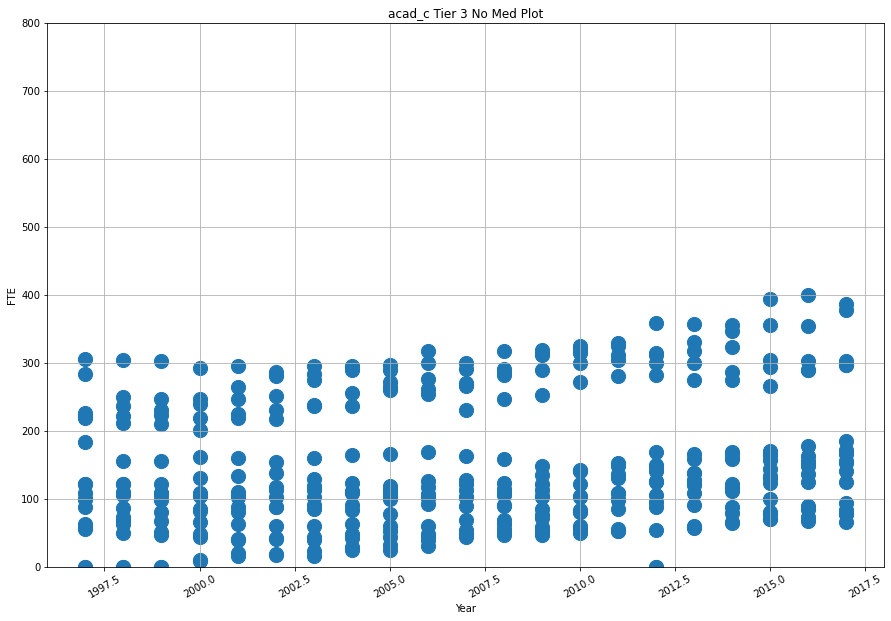

In [133]:
#6 gp3 no med
acad_c_gp3N = acad_c.loc[(acad_c["GROUP"]== 3 )&(acad_c["MED"]==0)]
plt.figure(figsize=(15,10))
plt.scatter(acad_c_gp3N["YEAR"],acad_c_gp3N["VALUE"], 200)
plt.title("acad_c Tier 3 No Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 800)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_c_gp3N.png")

In [66]:
### Academic Group D & E 

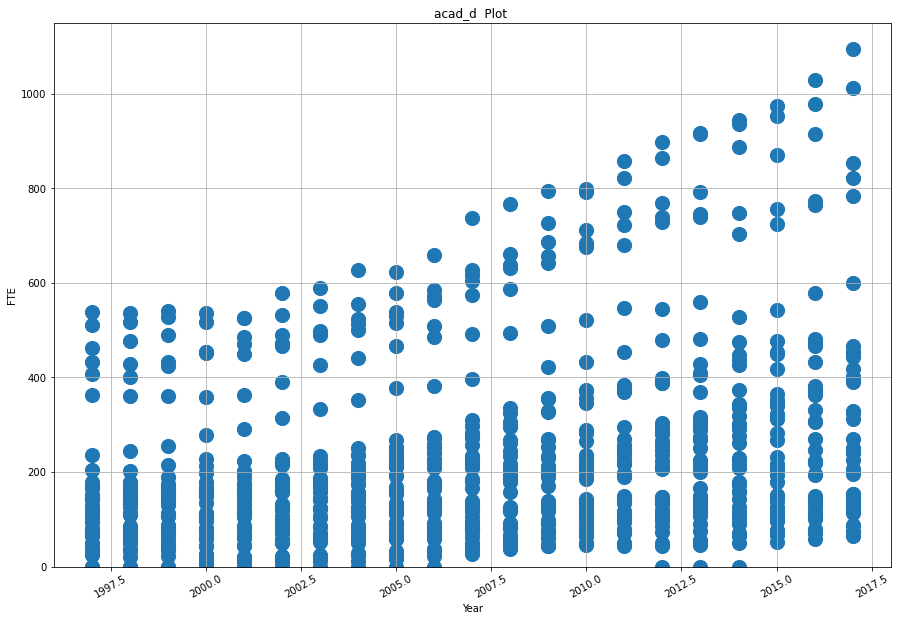

In [136]:
#1
acad_d = job_bins.loc[(job_bins["BINS"]== 8)]
plt.figure(figsize=(15,10))
plt.scatter(acad_d["YEAR"],acad_d["VALUE"], 200)
plt.title("acad_d  Plot ")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1150)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_d_all.png")

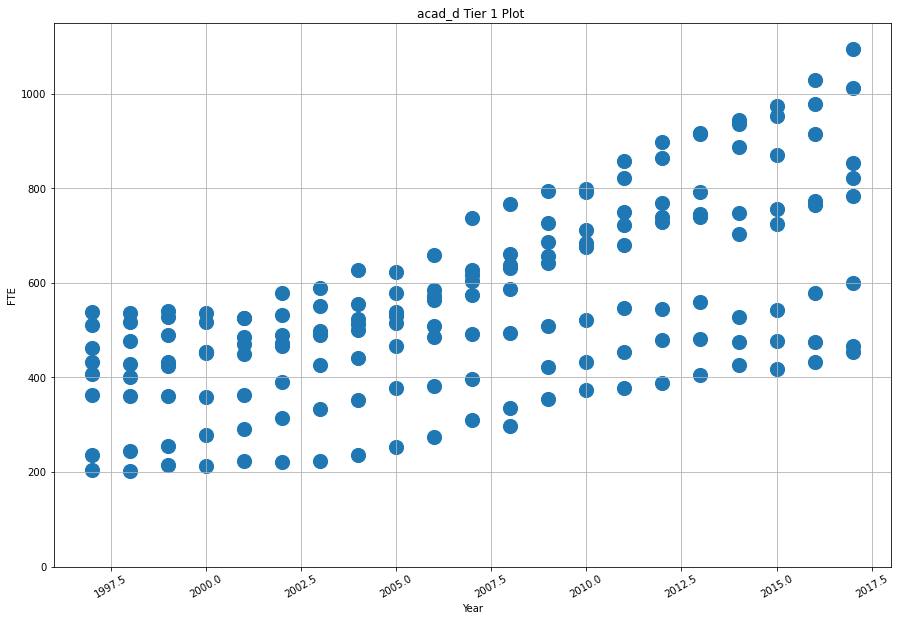

In [137]:
#2 Group 1 
acad_d_gp1 = acad_d.loc[(acad_d["GROUP"]== 1 )]
plt.figure(figsize=(15,10))
plt.scatter(acad_d_gp1["YEAR"],acad_d_gp1["VALUE"], 200)
plt.title("acad_d Tier 1 Plot ")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1150)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_d_gp1.png")

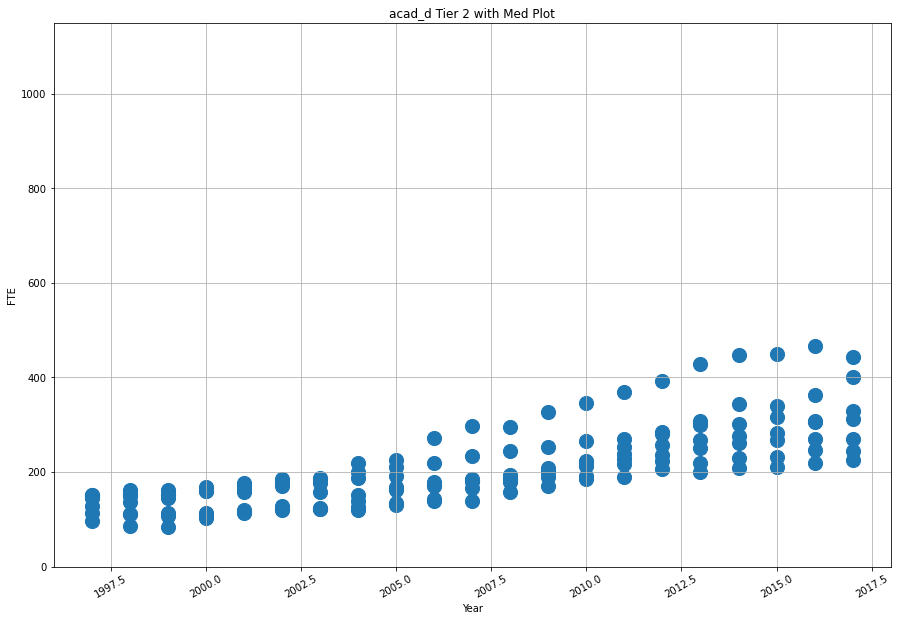

In [138]:
#3 gp2 with med
acad_d_gp2m = acad_d.loc[(acad_d["GROUP"]== 2 )&(acad_d["MED"]==1)]
plt.figure(figsize=(15,10))
plt.scatter(acad_d_gp2m["YEAR"],acad_d_gp2m["VALUE"], 200)
plt.title("acad_d Tier 2 with Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1150)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_d_gp2m.png")

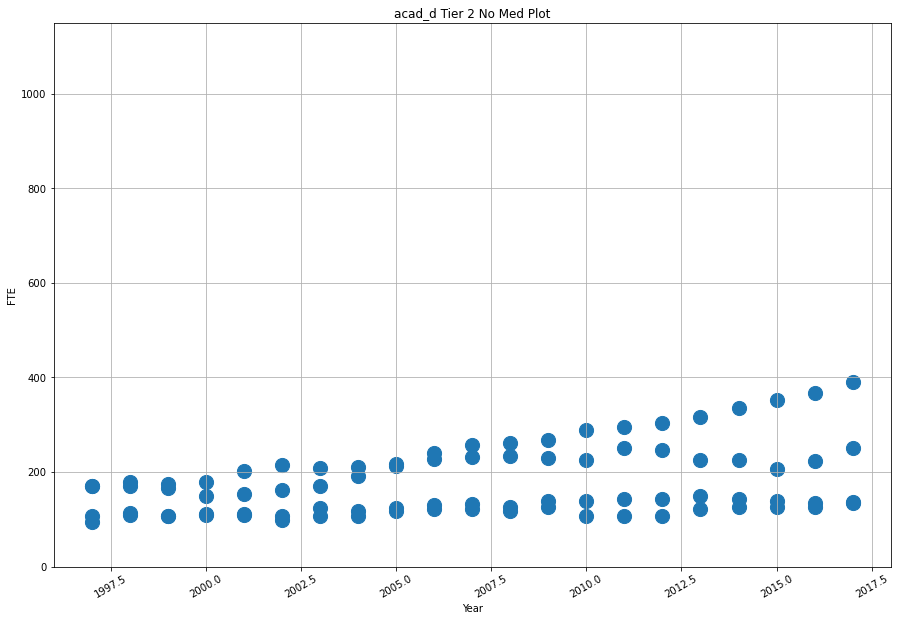

In [139]:
#4 gp2 no med
acad_d_gp2N = acad_d.loc[(acad_d["GROUP"]== 2 )&(acad_d["MED"]==0)]
plt.figure(figsize=(15,10))
plt.scatter(acad_d_gp2N["YEAR"],acad_d_gp2N["VALUE"], 200)
plt.title("acad_d Tier 2 No Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1150)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_d_gp2N.png")

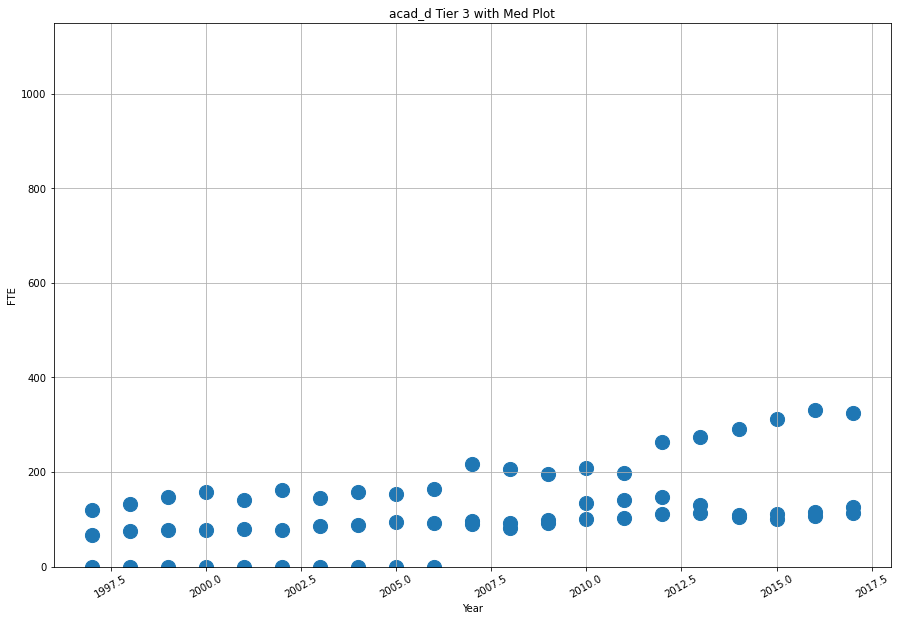

In [140]:
#5 gp3 with med
acad_d_gp3m = acad_d.loc[(acad_d["GROUP"]== 3 )&(acad_d["MED"]==1)]
plt.figure(figsize=(15,10))
plt.scatter(acad_d_gp3m["YEAR"],acad_d_gp3m["VALUE"], 200)
plt.title("acad_d Tier 3 with Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1150)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_d_gp3m.png")

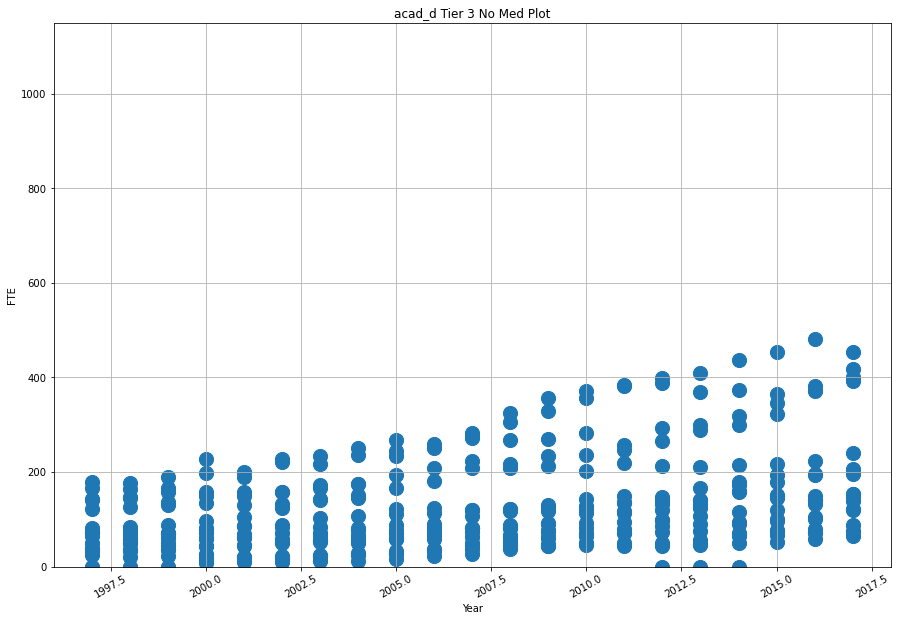

In [141]:
#6 gp3 no med
acad_d_gp3N = acad_d.loc[(acad_d["GROUP"]== 3 )&(acad_d["MED"]==0)]
plt.figure(figsize=(15,10))
plt.scatter(acad_d_gp3N["YEAR"],acad_d_gp3N["VALUE"], 200)
plt.title("acad_d Tier 3 No Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1150)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/acad_d_gp3N.png")

In [73]:
#### Casual Non Academic 

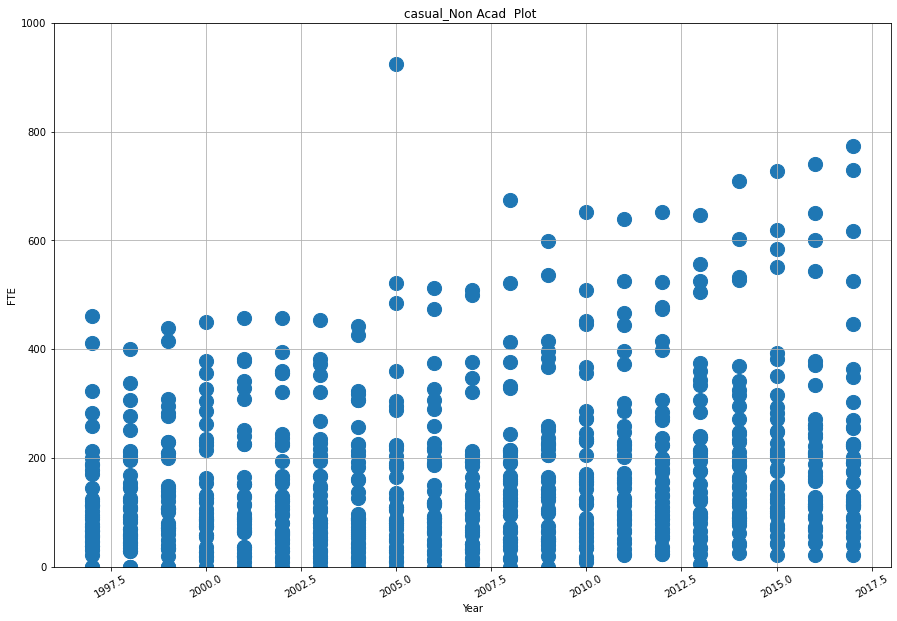

In [142]:
#1
cas_na = job_bins.loc[(job_bins["BINS"]== 9)]
plt.figure(figsize=(15,10))
plt.scatter(cas_na["YEAR"],cas_na["VALUE"], 200)
plt.title("casual_Non Acad  Plot ")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1000)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/cas_na_all.png")

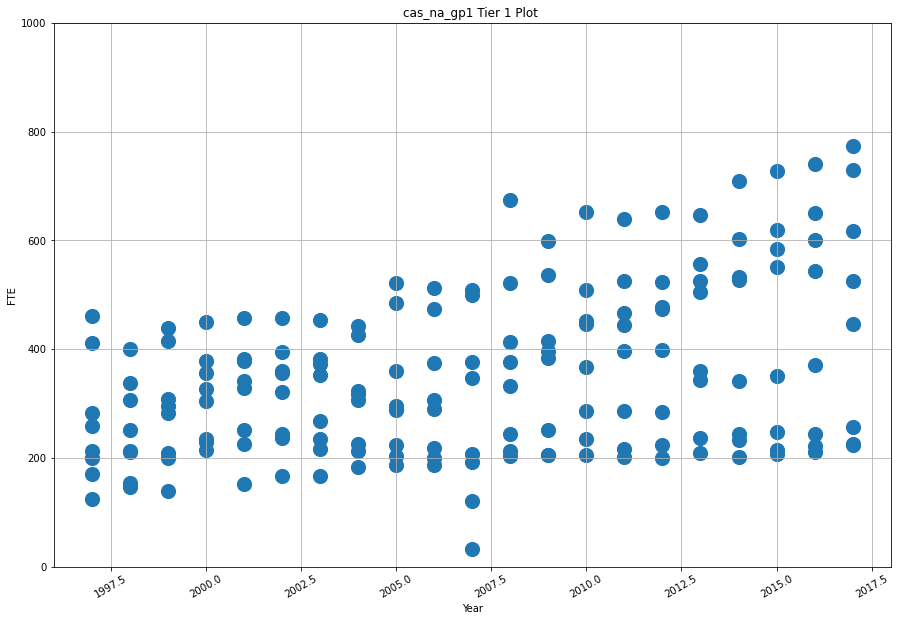

In [143]:
#2 Group 1 
cas_na_gp1 = cas_na.loc[(cas_na["GROUP"]== 1 )]
plt.figure(figsize=(15,10))
plt.scatter(cas_na_gp1["YEAR"],cas_na_gp1["VALUE"], 200)
plt.title("cas_na_gp1 Tier 1 Plot ")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1000)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/cas_na_gp1.png")

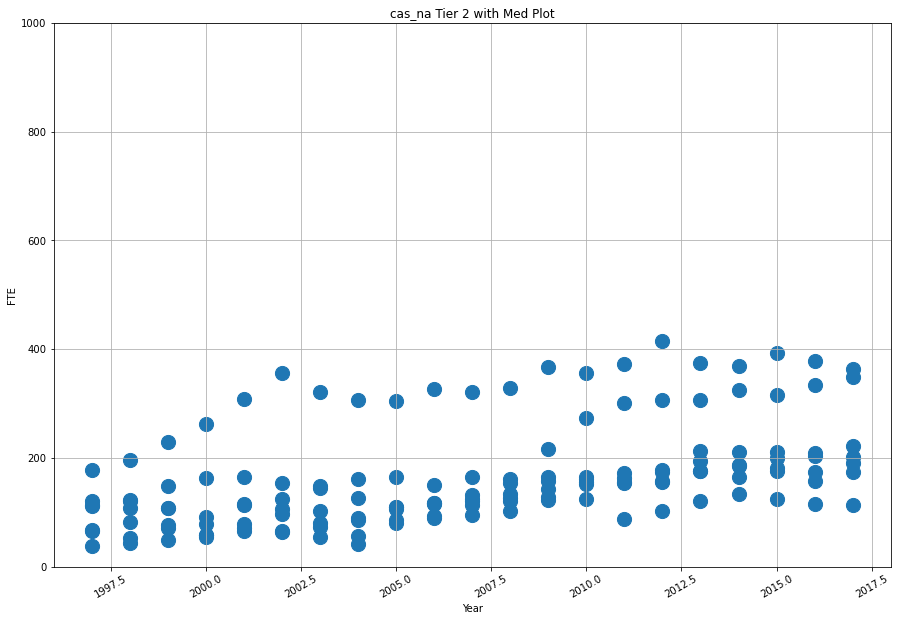

In [144]:
#3 gp2 with med
cas_na_gp2m = cas_na.loc[(cas_na["GROUP"]== 2 )&(cas_na["MED"]==1)]
plt.figure(figsize=(15,10))
plt.scatter(cas_na_gp2m["YEAR"],cas_na_gp2m["VALUE"], 200)
plt.title("cas_na Tier 2 with Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1000)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/cas_na_gp2m.png")

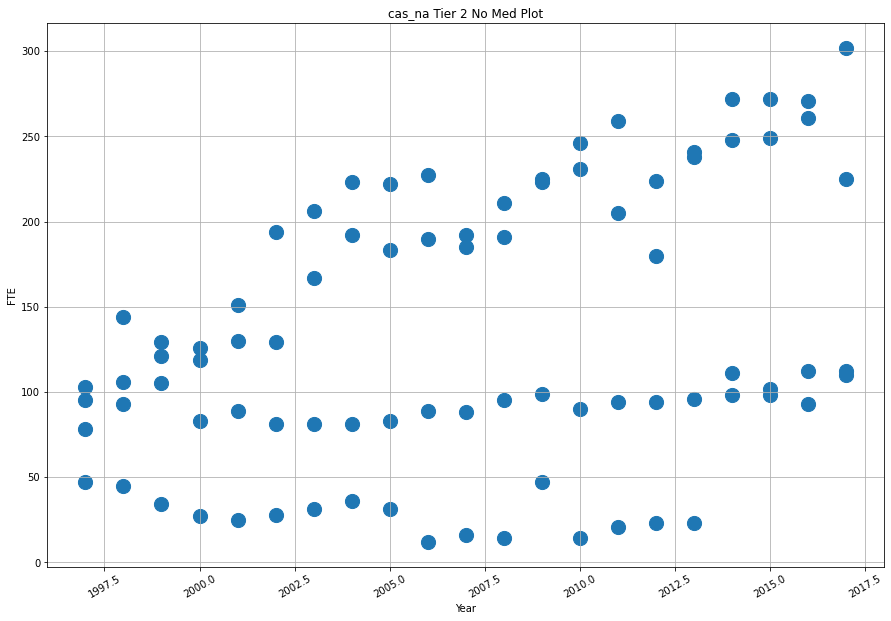

In [77]:
#4 gp2 no med
cas_na_gp2N = cas_na.loc[(cas_na["GROUP"]== 2 )&(cas_na["MED"]==0)]
plt.figure(figsize=(15,10))
plt.scatter(cas_na_gp2N["YEAR"],cas_na_gp2N["VALUE"], 200)
plt.title("cas_na Tier 2 No Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1000)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/cas_na_gp2N.png")

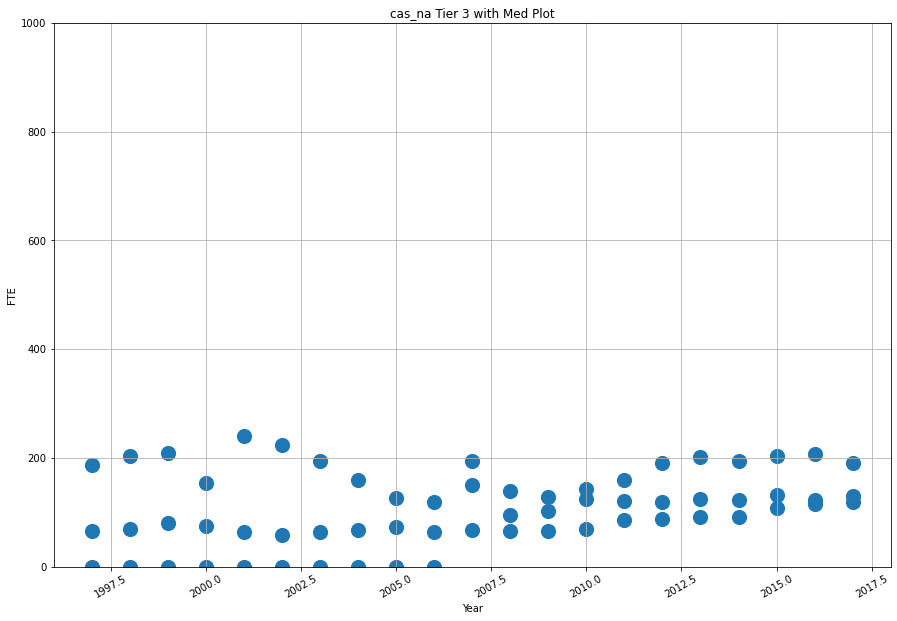

In [145]:
#5 gp3 with med
cas_na_gp3m = cas_na.loc[(cas_na["GROUP"]== 3 )&(cas_na["MED"]==1)]
plt.figure(figsize=(15,10))
plt.scatter(cas_na_gp3m["YEAR"],cas_na_gp3m["VALUE"], 200)
plt.title("cas_na Tier 3 with Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1000)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/cas_na_gp3m.png")

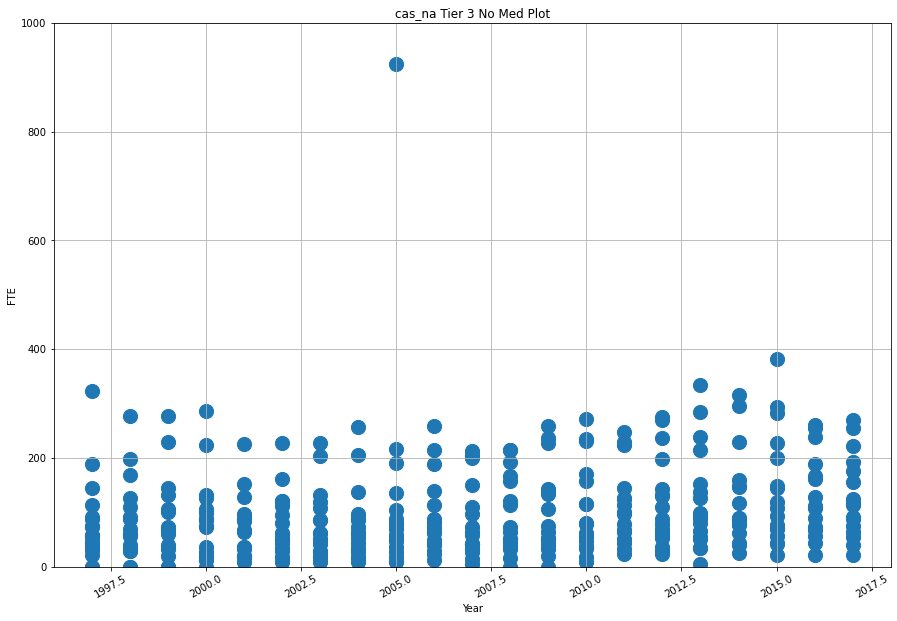

In [146]:
#6 gp3 no med
cas_na_gp3N = cas_na.loc[(cas_na["GROUP"]== 3 )&(cas_na["MED"]==0)]
plt.figure(figsize=(15,10))
plt.scatter(cas_na_gp3N["YEAR"],cas_na_gp3N["VALUE"], 200)
plt.title("cas_na Tier 3 No Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1000)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/cas_na_gp3N.png")

In [80]:
#### Casual Academic 

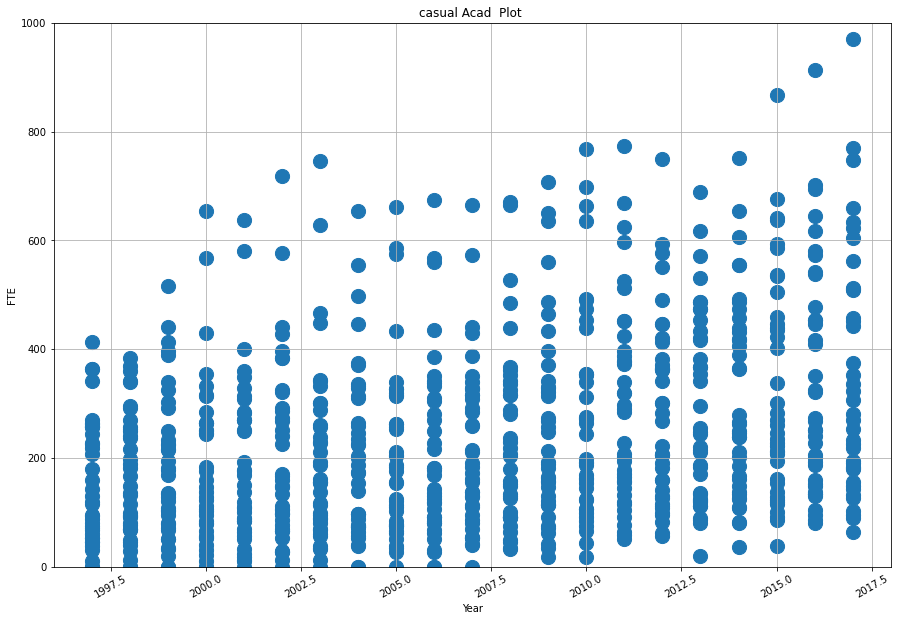

In [147]:
#1
cas_ac = job_bins.loc[(job_bins["BINS"]== 10)]
plt.figure(figsize=(15,10))
plt.scatter(cas_ac["YEAR"],cas_ac["VALUE"], 200)
plt.title("casual Acad  Plot ")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1000)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/cas_ac_all.png")

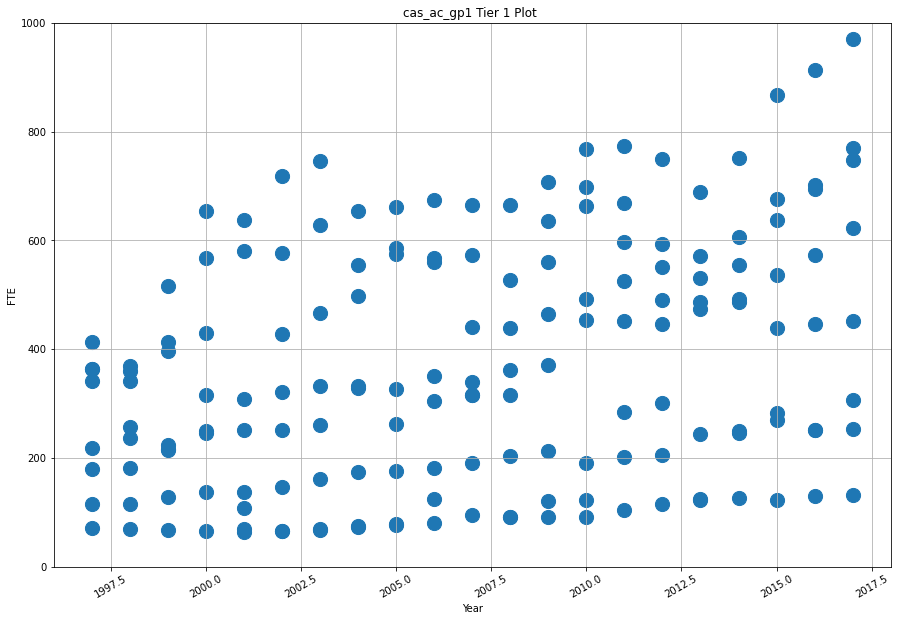

In [148]:
#2 Group 1 
cas_ac_gp1 = cas_ac.loc[(cas_ac["GROUP"]== 1 )]
plt.figure(figsize=(15,10))
plt.scatter(cas_ac_gp1["YEAR"],cas_ac_gp1["VALUE"], 200)
plt.title("cas_ac_gp1 Tier 1 Plot ")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1000)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/cas_ac_gp1.png")

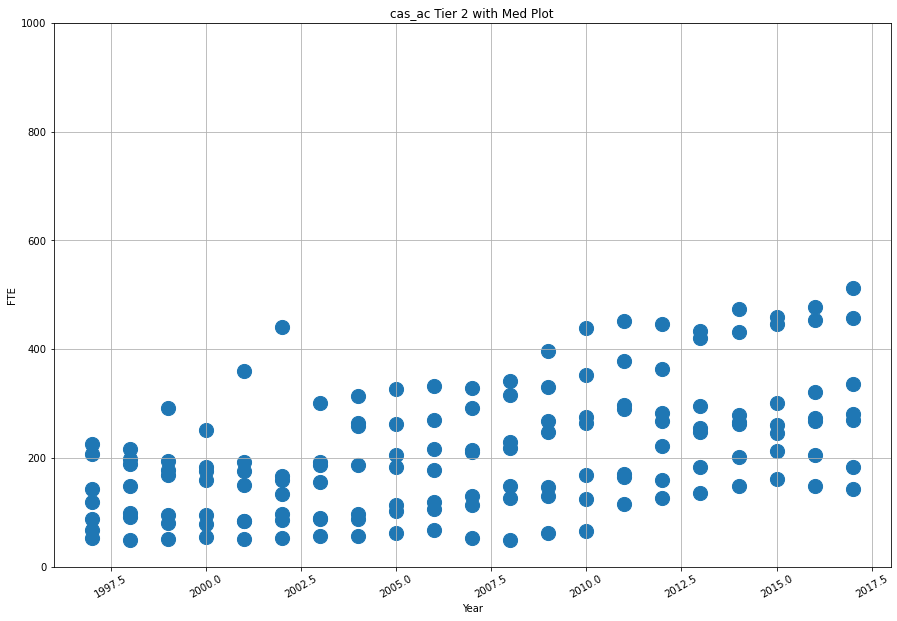

In [149]:
#3 gp2 with med
cas_ac_gp2m = cas_ac.loc[(cas_ac["GROUP"]== 2 )&(cas_ac["MED"]==1)]
plt.figure(figsize=(15,10))
plt.scatter(cas_ac_gp2m["YEAR"],cas_ac_gp2m["VALUE"], 200)
plt.title("cas_ac Tier 2 with Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1000)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/cas_ac_gp2m.png")

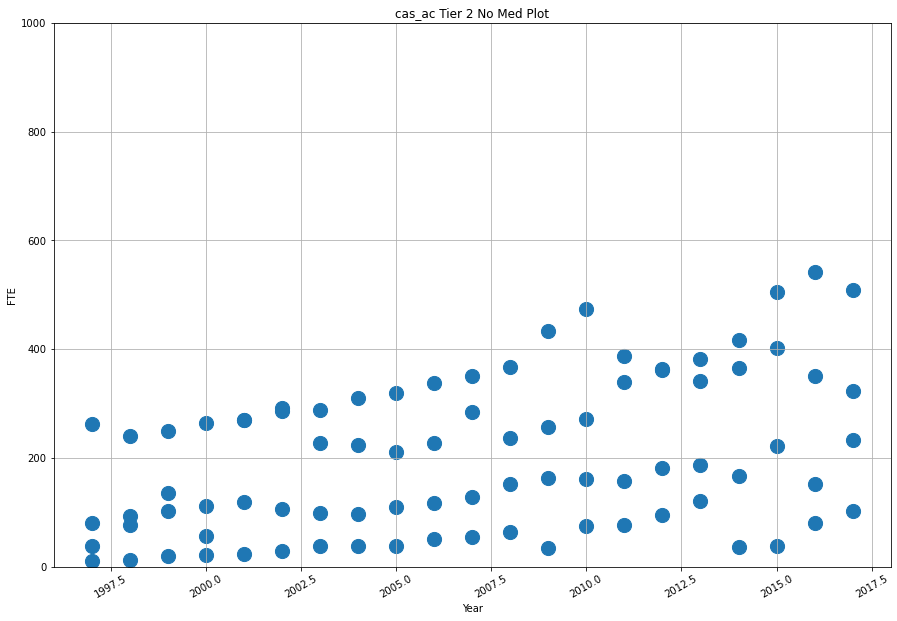

In [150]:
#4 gp2 no med
cas_ac_gp2N = cas_ac.loc[(cas_ac["GROUP"]== 2 )&(cas_ac["MED"]==0)]
plt.figure(figsize=(15,10))
plt.scatter(cas_ac_gp2N["YEAR"],cas_ac_gp2N["VALUE"], 200)
plt.title("cas_ac Tier 2 No Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1000)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/cas_ac_gp2N.png")

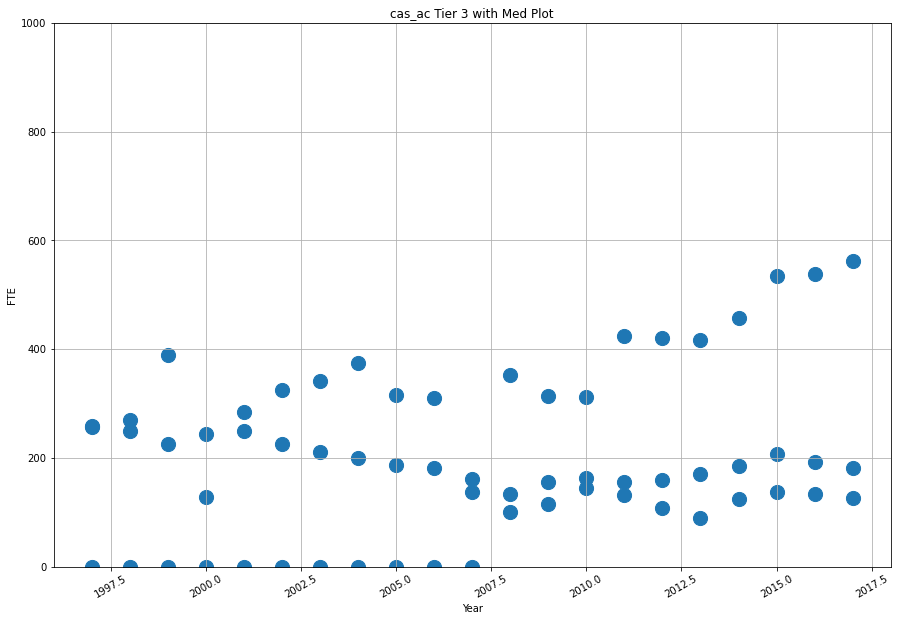

In [151]:
#5 gp3 with med
cas_ac_gp3m = cas_ac.loc[(cas_ac["GROUP"]== 3 )&(cas_ac["MED"]==1)]
plt.figure(figsize=(15,10))
plt.scatter(cas_ac_gp3m["YEAR"],cas_ac_gp3m["VALUE"], 200)
plt.title("cas_ac Tier 3 with Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1000)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/cas_ac_gp3m.png")

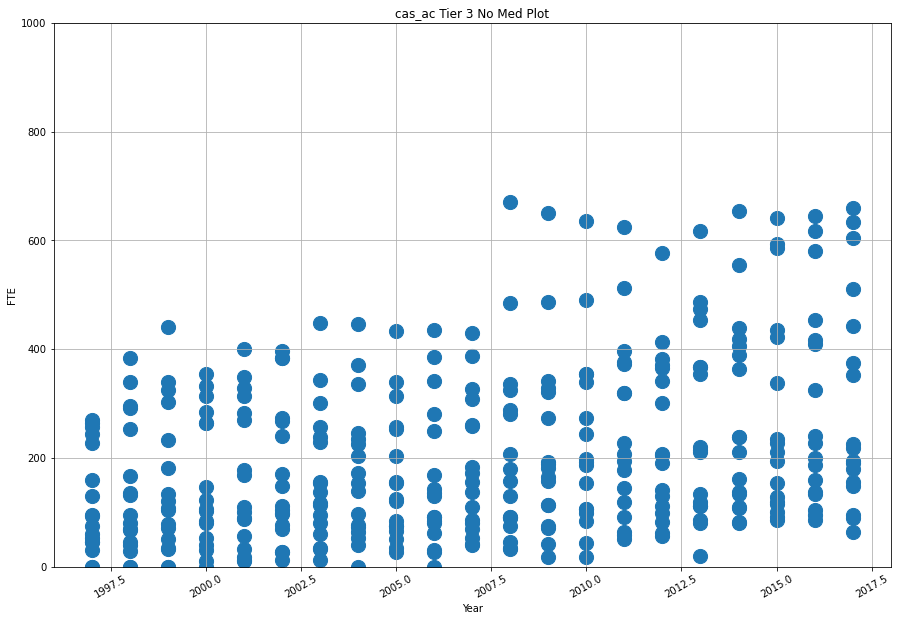

In [152]:
#6 gp3 no med
cas_ac_gp3N = cas_ac.loc[(cas_ac["GROUP"]== 3 )&(cas_ac["MED"]==0)]
plt.figure(figsize=(15,10))
plt.scatter(cas_ac_gp3N["YEAR"],cas_ac_gp3N["VALUE"], 200)
plt.title("cas_ac Tier 3 No Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 1000)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/cas_ac_gp3N.png")

In [87]:
## SE Class 

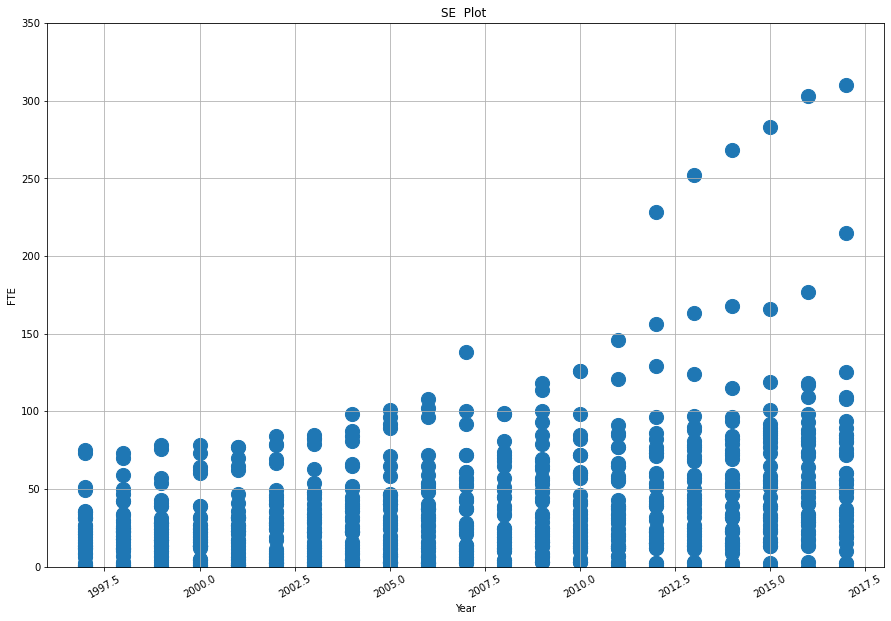

In [154]:
#1
se = job_bins.loc[(job_bins["BINS"]== 11)]
plt.figure(figsize=(15,10))
plt.scatter(se["YEAR"],se["VALUE"], 200)
plt.title("SE  Plot ")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 350)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/se_all.png")

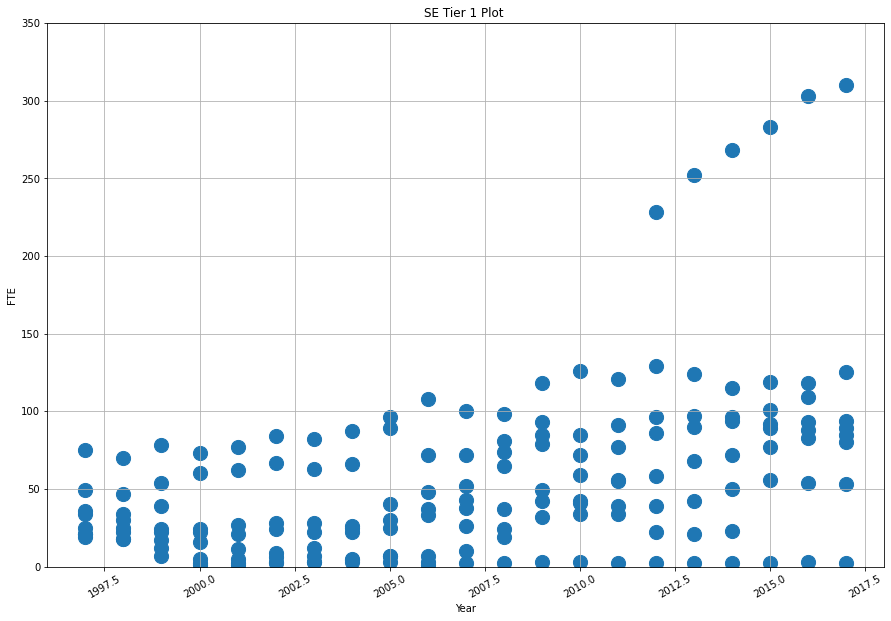

In [155]:
#2 Group 1 
se_gp1 = se.loc[(se["GROUP"]== 1 )]
plt.figure(figsize=(15,10))
plt.scatter(se_gp1["YEAR"],se_gp1["VALUE"], 200)
plt.title("SE Tier 1 Plot ")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 350)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/se_gp1.png")

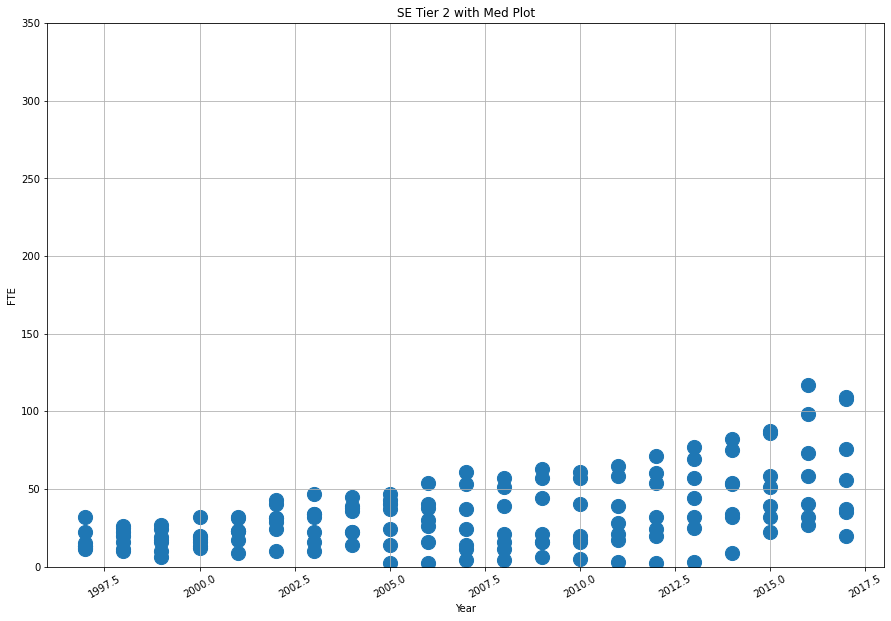

In [156]:
#3 gp2 with med
se_gp2m = se.loc[(se["GROUP"]== 2 )&(se["MED"]==1)]
plt.figure(figsize=(15,10))
plt.scatter(se_gp2m["YEAR"],se_gp2m["VALUE"], 200)
plt.title("SE Tier 2 with Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 350)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/se_gp2m.png")

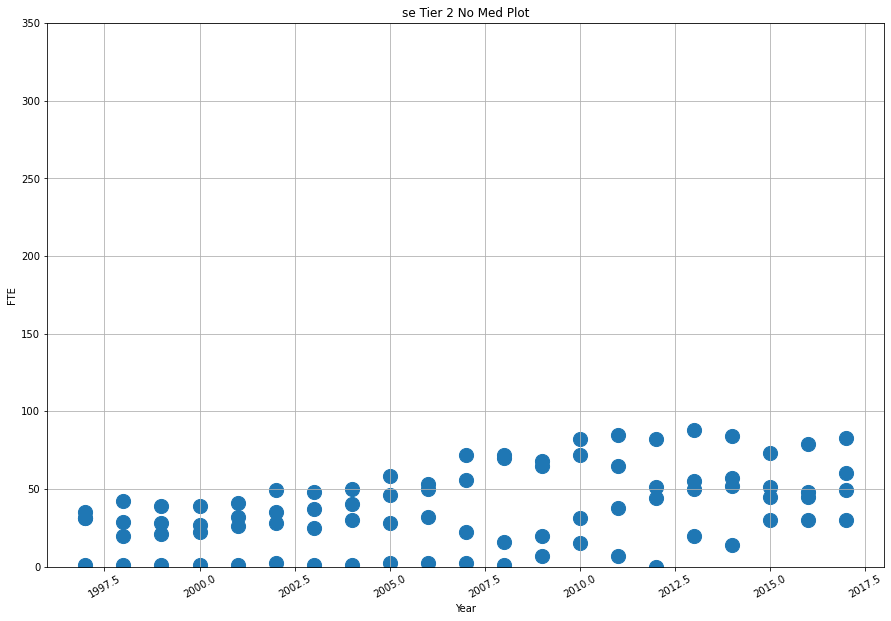

In [157]:
#4 gp2 no med
se_gp2N = se.loc[(se["GROUP"]== 2 )&(se["MED"]==0)]
plt.figure(figsize=(15,10))
plt.scatter(se_gp2N["YEAR"],se_gp2N["VALUE"], 200)
plt.title("se Tier 2 No Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 350)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/se_gp2N.png")

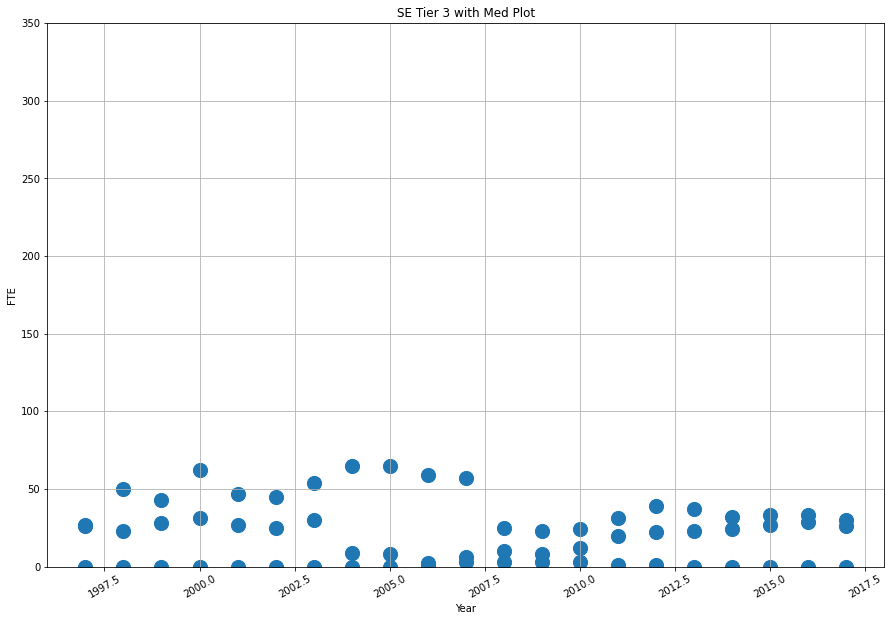

In [158]:
#5 gp3 with med
se_gp3m = se.loc[(se["GROUP"]== 3 )&(se["MED"]==1)]
plt.figure(figsize=(15,10))
plt.scatter(se_gp3m["YEAR"],se_gp3m["VALUE"], 200)
plt.title("SE Tier 3 with Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 350)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/se_gp3m.png")

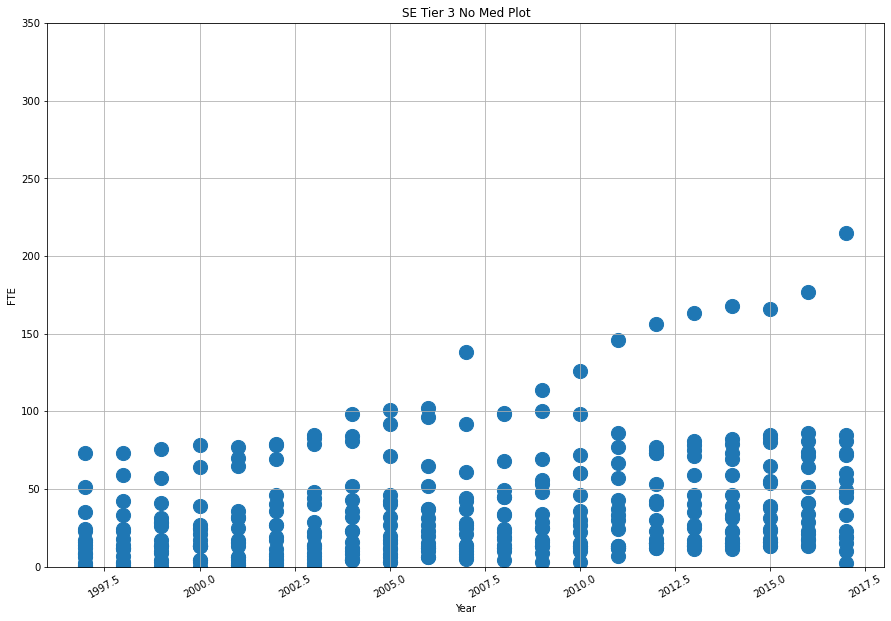

In [159]:
#6 gp3 no med
se_gp3N = se.loc[(se["GROUP"]== 3 )&(se["MED"]==0)]
plt.figure(figsize=(15,10))
plt.scatter(se_gp3N["YEAR"],se_gp3N["VALUE"], 200)
plt.title("SE Tier 3 No Med Plot")
plt.grid()
plt.xlabel("Year")
plt.ylabel("FTE")
markersize=40
plt.ylim(0, 350)
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig("job_split/se_gp3N.png")